# Affine Transformations
-----------
## Jorge Manuel Pool Cen

The code consists in the notebook for testing and the modules that constains the functions for the matrix operations to affine transformations.

In [8]:
# Load Libraries and Modules

# for data manipulation
from modules.functions import rotation_matrix, scaling_matrix,shearing_matrix
from modules.functions import compute_matrix_transformation, compute_affine
from modules.functions import get_matrix_augemented, get_point_homogenous
from modules.visualization import plot_points, show_image

# for matrix computation
import numpy as np
# for image processing
from PIL import Image

%pip install pillow

## Test a Single Point
----
Probando el codigo con un punto


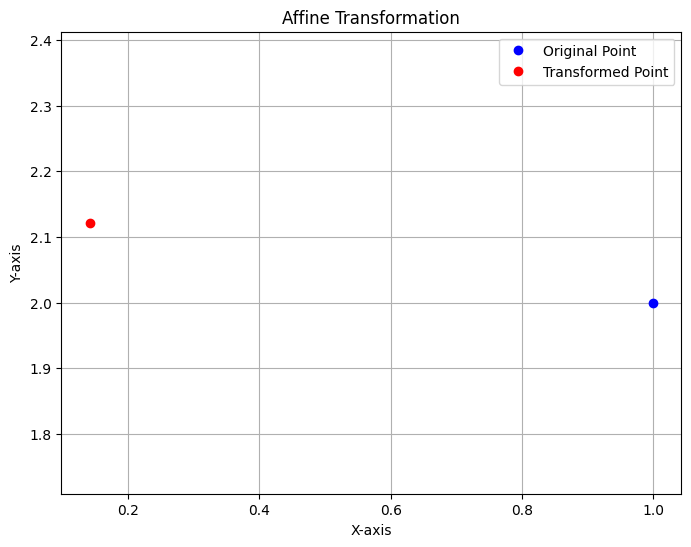

In [9]:
# %% Test the functions with a single point and vector b
## theta parameter in degree
theta = 45
## scaling parameters sx, sy
sx=1
sy=1
## seharing parameter 
h=0.4
## define the matrices
R = rotation_matrix(theta)
S = scaling_matrix(sx,sy)
H = shearing_matrix(h) 

## compute the matrix A
A = compute_matrix_transformation(R,S,H)
b = np.array([[0],[0]])

#defining a point
point = np.array([[1],
                  [2]])

transformed_point = compute_affine(A,b,point)

plot_points(point,transformed_point)

# Testing with Image

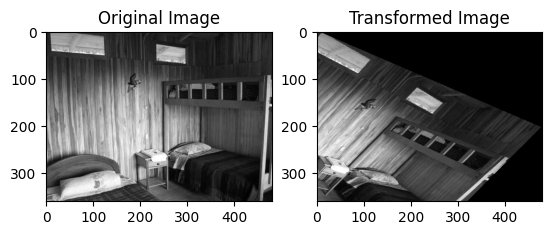

In [10]:
#load image
image = Image.open('homeworks/data/beds.jpg')
image = image.convert('L') # convert the image to grayscale

# convert the image to a numpy array
image = np.array(image)


#build the transformed image
transformed_image = np.zeros_like(image)

#apply the affine transformation to each pixel in the image
A_augmented = get_matrix_augemented(A,b)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        point = np.array([[i],[j]])
        point_homogeneous = get_point_homogenous(point)
        transformed_point_image =  np.dot(A_augmented,point_homogeneous) #compute_affine(A, b, point)
        x = int(transformed_point_image[0,0])
        y = int(transformed_point_image[1,0])
        if x >= 0 and x < image.shape[0] and y >= 0 and y < image.shape[1]:
            transformed_image[i,j] = image[x,y]


show_image(image,transformed_image)